In [1]:
#Final version - Bairds "7-star" counter-example
import numpy as np
from scipy.linalg import eig 
import mdptoolbox, mdptoolbox.example
import random
from numpy.random import seed
import time


def get_next_state(state,action):
    
    if action == 0:
        next_state = 6
    else:
        next_state = np.random.choice(6)
    
    return next_state
    
    
def feature_state(thetha,state):
    if state == 0:
        return 2*thetha[0] + thetha[7]
    if state == 1:
        return 2*thetha[1]+thetha[7]
    if state == 2:
        return 2*thetha[2]+thetha[7]
    if state == 3:
        return 2*thetha[3]+thetha[7]
    if state == 4:
        return 2*thetha[4]+thetha[7]
    if state == 5:
        return 2*thetha[5]+thetha[7]
    if state == 6:
        return thetha[6] + 2*thetha[7]



def grad_state(state):
    if state == 0:
        return np.array([2.0,0.0,0,0,0,0,0,1])
    if state == 1:
        return np.array([0.0,2.0,0,0,0,0,0,1])
    if state == 2:
        return np.array([0.0,0.0,2,0,0,0,0,1])
    if state == 3:
        return np.array([0.0,0.0,0,2,0,0,0,1])
    if state == 4:
        return np.array([0.0,0.0,0,0,2,0,0,1])
    if state == 5:
        return np.array([0.0,0.0,0,0,0,2,0,1])
    if state == 6:
        return np.array([0.0,0.0,0,0,0,0,1,2])
    

total_runs = 10
total_iterations = 1000000



alpha = 0.000001
beta = 10*alpha

error_storage_gtd = np.zeros((total_runs,total_iterations))


for runs in range(total_runs):
    
    np.random.seed((runs+1)*100)
    random.seed((runs+1)*110)
    
    opt = np.array([[0,0,0,0,0,0,0]])

    
    thetha = [1,1,1,1,1,1,10,1]
    thetha_td = [1,1,1,1,1,1,10,1]
    discount = 0.99
    
    
    pi = np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0]])
    mu = np.array([[1/7,6/7],[1/7,6/7],[1/7,6/7],[1/7,6/7],[1/7,6/7],[1/7,6/7],[1/7,6/7]])
        
    d_mu = np.array([[1/7,1/7,1/7,1/7,1/7,1/7,1/7]])
        
    thetha_GTD = [1,1,1,1,1,1,10,1]
    w = thetha_GTD
    
    state = np.random.choice(7)
    for main_iter in range(total_iterations):
        
        action = np.random.choice(2,1,p=[1/7,6/7])[0]
        importance_sampling = pi[state,action]    
        next_state = get_next_state(state,action)


        grad = grad_state(state)
        
        delta = 0 + discount*feature_state(thetha_GTD,next_state) - feature_state(thetha_GTD,state)
        
        #thetha_GTD = thetha_GTD + alpha*importance_sampling*feature_state(w,state)*(grad_state(state)- discount*grad_state(next_state))
        thetha_GTD = thetha_GTD + alpha*importance_sampling*(delta*grad_state(state) - discount*feature_state(w,state)*grad_state(next_state))
        w = w + beta*importance_sampling*(delta - feature_state(w,state))*grad_state(state)
        
        
        state = next_state
        
        v_gtd = np.zeros((7,1))
        
        for i in range(7):
            v_gtd[i,0] = feature_state(thetha_GTD,i)

        
        error_storage_gtd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_gtd))))
        

        
print(thetha_GTD)



[1.31983664 1.3238124  1.32482438 1.32272899 1.3217551  1.32071311
 9.21698466 0.40080464]


In [2]:
#Be careful
np.savetxt('Bairds-gtd-0.000001',np.average(error_storage_gtd,axis = 0))

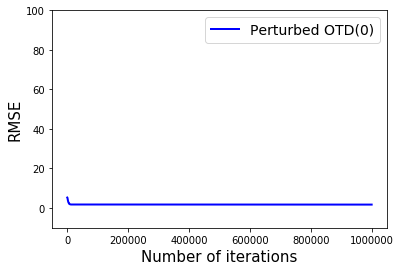

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.average(error_storage_gtd,axis = 0), 'b',linewidth = 2, label = 'Perturbed OTD(0)')

plt.ylim([-10,100])

plt.legend(loc = 'best',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()